### Import Necesary Libraries & Utils

In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt

%run ../src/utils/dataframe_util.ipynb
%run ../src/utils/eda_util.ipynb
%run ../src/utils/transformation_util.ipynb

### Import Data Sets

In [2]:
training_df = load_datasets("../data/training_data.csv")
testing_df = load_datasets("../data/test_data.csv")

### Exploratory Data Analysis

In [3]:
training_df.head(20)

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,11/1/2021,Grocery,1.000,160.000,XYZ,16620,1475459.0
1,11/1/2021,Grocery,2.000,480.000,XYZ,32365,1475459.0
2,11/1/2021,Grocery,1.000,127.000,XYZ,31349,1475459.0
3,11/1/2021,Household,2.000,110.000,XYZ,1266,1475475.0
4,11/1/2021,Household,1.000,150.000,XYZ,114920,1475475.0
5,11/1/2021,Household,1.000,745.000,XYZ,115596,1475475.0
6,11/1/2021,Grocery,1.000,175.000,XYZ,98654,1475475.0
7,11/1/2021,Grocery,3.000,120.000,XYZ,8373,1475475.0
8,11/1/2021,Grocery,1.000,194.000,XYZ,106669,1475521.0
9,11/1/2021,Household,1.000,137.000,XYZ,75008,1475521.0


In [4]:
testing_df.head()

,date_id,item_dept,item_qty,net_sales,store,item,invoice_num
0,2/1/2022,Beverages,2.0,480.0,XYZ,112360,1495518.0
1,2/1/2022,Beverages,1.0,202.0,XYZ,111195,1495518.0
2,2/1/2022,Household,1.0,165.0,XYZ,41212,1495572.0
3,2/1/2022,Household,2.0,480.0,XYZ,123476,1495572.0
4,2/1/2022,Grocery,2.0,660.0,XYZ,106668,1495572.0


In [5]:
# Analyse of training data
training_df.describe()

,item_qty,net_sales,item,invoice_num
count,614098.000000,614098.000000,614098.00000,5.912880e+05
mean,1.533792,335.067969,67622.41479,4.231954e+06
std,3.058092,824.733169,48909.65677,1.704178e+06
min,-59.000000,-15250.000000,906.00000,1.475419e+06
25%,1.000000,124.000000,14340.00000,2.581947e+06
50%,1.000000,215.000000,89725.00000,4.597865e+06
75%,1.668000,371.000000,117021.00000,5.598286e+06
max,880.000000,316880.280000,124146.00000,9.354809e+06


In [6]:
# Analyse of testing data
testing_df.describe()

,item_qty,net_sales,item,invoice_num
count,247624.000000,247624.000000,247624.000000,2.393190e+05
mean,1.483270,337.917961,67301.092705,4.216961e+06
std,3.338285,1098.152325,48872.700575,1.723722e+06
min,-15.000000,-6400.000000,906.000000,1.495460e+06
25%,1.000000,130.000000,14544.000000,2.591172e+06
50%,1.000000,220.000000,84631.000000,4.614483e+06
75%,1.002000,390.000000,116935.000000,5.608592e+06
max,1200.000000,492000.000000,124233.000000,9.366931e+06


In [7]:
# Remove item column from both data sets
training_cleaned = training_df.drop(columns=('item'))
training_cleaned.head()
training_cleaned = training_df.drop(columns=('invoice_num'))
training_cleaned.head()

test_cleaned = testing_df.drop(columns=('item'))
test_cleaned.head()
test_cleaned = testing_df.drop(columns=('invoice_num'))
test_cleaned.head()

,date_id,item_dept,item_qty,net_sales,store,item
0,2/1/2022,Beverages,2.0,480.0,XYZ,112360
1,2/1/2022,Beverages,1.0,202.0,XYZ,111195
2,2/1/2022,Household,1.0,165.0,XYZ,41212
3,2/1/2022,Household,2.0,480.0,XYZ,123476
4,2/1/2022,Grocery,2.0,660.0,XYZ,106668


In [8]:
# Check data types of training data
training_cleaned.dtypes

date_id       object
item_dept     object
item_qty     float64
net_sales    float64
store         object
item           int64
dtype: object

In [9]:
# Check data types of testing data
test_cleaned.dtypes

date_id       object
item_dept     object
item_qty     float64
net_sales    float64
store         object
item           int64
dtype: object

In [10]:
# Check null values
print_null_summary(training_cleaned, "training")
print_null_summary(test_cleaned, "testing")

Null values in training:
+----------+---------------+----------+
| Column   | Null Values   | Out of   |
|----------+---------------+----------|
+----------+---------------+----------+

Null values in testing:
+----------+---------------+----------+
| Column   | Null Values   | Out of   |
|----------+---------------+----------|
+----------+---------------+----------+



In [11]:
# Remove null records from training data set
# training_cleaned = training_cleaned.dropna(subset=['invoice_num'])
# training_cleaned.head()

In [12]:
# Remove null records from testing data set
# test_cleaned = test_cleaned.dropna(subset=['invoice_num'])
# test_cleaned.head()

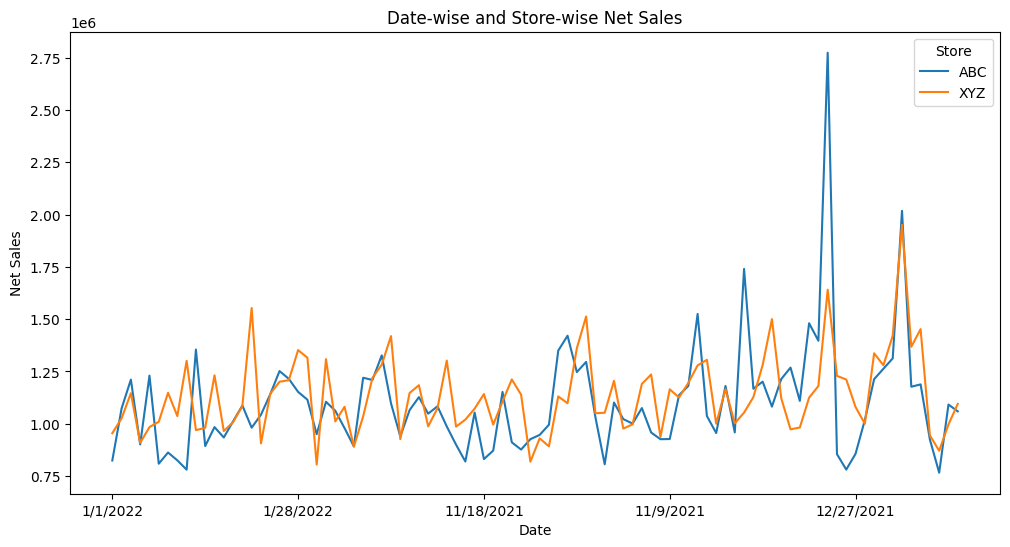

In [13]:
grouped_df = training_cleaned.groupby(['date_id', 'store'])['net_sales'].sum().reset_index()
pivot_df = grouped_df.pivot(index='date_id', columns='store', values='net_sales')
pivot_df.plot(figsize=(12, 6))
plt.title('Date-wise and Store-wise Net Sales')
plt.xlabel('Date')
plt.ylabel('Net Sales')
plt.legend(title='Store')
plt.show()

In [14]:
training_cleaned.head(20)

,date_id,item_dept,item_qty,net_sales,store,item
0,11/1/2021,Grocery,1.000,160.000,XYZ,16620
1,11/1/2021,Grocery,2.000,480.000,XYZ,32365
2,11/1/2021,Grocery,1.000,127.000,XYZ,31349
3,11/1/2021,Household,2.000,110.000,XYZ,1266
4,11/1/2021,Household,1.000,150.000,XYZ,114920
5,11/1/2021,Household,1.000,745.000,XYZ,115596
6,11/1/2021,Grocery,1.000,175.000,XYZ,98654
7,11/1/2021,Grocery,3.000,120.000,XYZ,8373
8,11/1/2021,Grocery,1.000,194.000,XYZ,106669
9,11/1/2021,Household,1.000,137.000,XYZ,75008


### Data Transformation

In [15]:
training_cleaned['date_id'] = pd.to_datetime(training_cleaned['date_id'])
training_cleaned = training_cleaned.groupby(['date_id', 'item_dept', 'store'])[['item_qty', 'net_sales']].sum().reset_index()
training_cleaned.head(20)

,date_id,item_dept,store,item_qty,net_sales
0,2021-11-01,Beverages,ABC,917.000,254547.799010
1,2021-11-01,Beverages,XYZ,779.000,187931.769020
2,2021-11-01,Grocery,ABC,2360.399,437286.624020
3,2021-11-01,Grocery,XYZ,2987.060,491450.723000
4,2021-11-01,Household,ABC,1043.000,247336.266010
5,2021-11-01,Household,XYZ,1124.000,247156.009988
6,2021-11-02,Beverages,ABC,1140.000,277904.838000
7,2021-11-02,Beverages,XYZ,922.000,251330.130000
8,2021-11-02,Grocery,ABC,3021.684,582206.592985
9,2021-11-02,Grocery,XYZ,3623.716,592195.489002


In [16]:
test_cleaned['date_id'] = pd.to_datetime(test_cleaned['date_id'])
test_cleaned = test_cleaned.groupby(['date_id', 'item_dept', 'store'])[['item_qty', 'net_sales']].sum().reset_index()
test_cleaned.head(20)

,date_id,item_dept,store,item_qty,net_sales
0,2022-02-01,Beverages,ABC,1672.000,427627.829100
1,2022-02-01,Beverages,XYZ,1152.000,268295.034010
2,2022-02-01,Grocery,ABC,3482.128,724896.269996
3,2022-02-01,Grocery,XYZ,4131.394,777378.278006
4,2022-02-01,Household,ABC,1363.000,364019.000000
5,2022-02-01,Household,XYZ,1340.000,343766.403990
6,2022-02-02,Beverages,ABC,1652.000,443960.459000
7,2022-02-02,Beverages,XYZ,1392.000,379689.474000
8,2022-02-02,Grocery,ABC,3256.287,636533.876996
9,2022-02-02,Grocery,XYZ,4251.348,808260.989004


In [17]:
training_model_data = create_lag_values(training_cleaned)
print(training_model_data)

       date_id  item_dept store  item_qty     net_sales  item_qty_lag_1  \
0   2021-11-01  Beverages   ABC   917.000  254547.79901     1707.363846   
1   2021-11-01  Beverages   XYZ   779.000  187931.76902      917.000000   
2   2021-11-01    Grocery   ABC  2360.399  437286.62402      779.000000   
3   2021-11-01    Grocery   XYZ  2987.060  491450.72300     2360.399000   
4   2021-11-01  Household   ABC  1043.000  247336.26601     2987.060000   
..         ...        ...   ...       ...           ...             ...   
547 2022-01-31  Beverages   XYZ   791.000  179122.36501      887.000000   
548 2022-01-31    Grocery   ABC  2603.874  542643.93100      791.000000   
549 2022-01-31    Grocery   XYZ  2996.909  563043.73400     2603.874000   
550 2022-01-31  Household   ABC  1115.000  314800.26999     2996.909000   
551 2022-01-31  Household   XYZ  1141.000  269010.67500     1115.000000   

     net_sales_lag_1  item_qty_lag_2  net_sales_lag_2  item_qty_lag_3  \
0      372950.198262     1

In [18]:
testing_model_data = create_lag_values(test_cleaned)
print(testing_model_data)

       date_id  item_dept store  item_qty      net_sales  item_qty_lag_1  \
0   2022-02-01  Beverages   ABC  1672.000  427627.829100     2189.181132   
1   2022-02-01  Beverages   XYZ  1152.000  268295.034010     1672.000000   
2   2022-02-01    Grocery   ABC  3482.128  724896.269996     1152.000000   
3   2022-02-01    Grocery   XYZ  4131.394  777378.278006     3482.128000   
4   2022-02-01  Household   ABC  1363.000  364019.000000     4131.394000   
..         ...        ...   ...       ...            ...             ...   
163 2022-02-28  Beverages   XYZ  1256.000  301840.902984     1496.000000   
164 2022-02-28    Grocery   ABC  3548.268  700557.436867     1256.000000   
165 2022-02-28    Grocery   XYZ  4854.414  950084.212008     3548.268000   
166 2022-02-28  Household   ABC  1520.000  394323.614974     4854.414000   
167 2022-02-28  Household   XYZ  1700.000  412074.053949     1520.000000   

     net_sales_lag_1  item_qty_lag_2  net_sales_lag_2  item_qty_lag_3  \
0      498589.

In [19]:
training_model_data.head()

,date_id,item_dept,store,item_qty,net_sales,item_qty_lag_1,net_sales_lag_1,item_qty_lag_2,net_sales_lag_2,item_qty_lag_3,net_sales_lag_3,item_qty_lag_4,net_sales_lag_4,item_qty_lag_5,net_sales_lag_5
0,2021-11-01,Beverages,ABC,917.000,254547.79901,1707.363846,372950.198262,1708.440871,373055.925404,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
1,2021-11-01,Beverages,XYZ,779.000,187931.76902,917.000000,254547.799010,1708.440871,373055.925404,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
2,2021-11-01,Grocery,ABC,2360.399,437286.62402,779.000000,187931.769020,917.000000,254547.799010,1706.093934,372709.863822,1704.45565,372399.76516,1706.125587,372753.105928
3,2021-11-01,Grocery,XYZ,2987.060,491450.72300,2360.399000,437286.624020,779.000000,187931.769020,917.000000,254547.799010,1704.45565,372399.76516,1706.125587,372753.105928
4,2021-11-01,Household,ABC,1043.000,247336.26601,2987.060000,491450.723000,2360.399000,437286.624020,779.000000,187931.769020,917.00000,254547.79901,1706.125587,372753.105928


In [20]:
testing_model_data.head()

,date_id,item_dept,store,item_qty,net_sales,item_qty_lag_1,net_sales_lag_1,item_qty_lag_2,net_sales_lag_2,item_qty_lag_3,net_sales_lag_3,item_qty_lag_4,net_sales_lag_4,item_qty_lag_5,net_sales_lag_5
0,2022-02-01,Beverages,ABC,1672.000,427627.829100,2189.181132,498589.958825,2193.212343,499218.069330,2177.083848,496485.547253,2168.72297,495241.206463,2174.322497,496427.711392
1,2022-02-01,Beverages,XYZ,1152.000,268295.034010,1672.000000,427627.829100,2193.212343,499218.069330,2177.083848,496485.547253,2168.72297,495241.206463,2174.322497,496427.711392
2,2022-02-01,Grocery,ABC,3482.128,724896.269996,1152.000000,268295.034010,1672.000000,427627.829100,2177.083848,496485.547253,2168.72297,495241.206463,2174.322497,496427.711392
3,2022-02-01,Grocery,XYZ,4131.394,777378.278006,3482.128000,724896.269996,1152.000000,268295.034010,1672.000000,427627.829100,2168.72297,495241.206463,2174.322497,496427.711392
4,2022-02-01,Household,ABC,1363.000,364019.000000,4131.394000,777378.278006,3482.128000,724896.269996,1152.000000,268295.034010,1672.00000,427627.829100,2174.322497,496427.711392


In [21]:
training_model_data.to_csv('../data/training_model_data.csv', index=False)

In [22]:
testing_model_data.to_csv('../data/testing_model_data.csv', index=False)